# Exploration of Name Commonness by Gender
## How Common are Common Names?
by Anya Michaelsen

## The Question

Once I was thinking about baby names and looking for names that are not too "common" but not too "weird". It seemed that there were many traditionally female names that lie between common and weird but traditionally male names almost always fell into either "too common" or "too weird" for my tastes. So I set out to quantify these differences and test my theory.

While generally subjective, what I realized I meant by "common" were names that I knew many people used and "weird" being names I had never heard of or had only met one or two people with those names. Of course my "common" and your "common" may differ depending on the people we have met, but generalizing to all names in a group provides a standard metric for "commonness" of a name.  

In [1]:
import pandas as pd
import numpy as np
np.random.seed(24)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

### The Dataset

Reading from [SSN Office description](https://www.ssa.gov/oact/babynames/background.html): 


> All names are from Social Security card applications for births that occurred in the United States after 1879. Note that many people born before 1937 never applied for a Social Security card, so their names are not included in our data. For others who did apply, our records may not show the place of birth, and again their names are not included in our data.

> To safeguard privacy, we exclude from our tabulated lists of names those that would indicate, or would allow the ability to determine, names with fewer than 5 occurrences in any geographic area. If a name has less than 5 occurrences for a year of birth in any state, the sum of the state counts for that year will be less than the national count.

> All data are from a 100% sample of our records on Social Security card applications as of March 2020.




### Get data programatically

In [2]:
import urllib.request
import os.path

# Download data from the web directly
data_url = "https://www.ssa.gov/oact/babynames/names.zip"
local_filename = "babynames.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

        
# Load data without unzipping the file
import zipfile
babynames = []
with zipfile.ZipFile(local_filename, "r") as zf:
    data_files = [f for f in zf.filelist if f.filename[-3:] == "txt"]
    def extract_year_from_filename(fn):
        return int(fn[3:7])
    for f in data_files:
        year = extract_year_from_filename(f.filename)
        with zf.open(f) as fp:
            df = pd.read_csv(fp, names=["Name", "Sex", "Count"])
            df["Year"] = year
            babynames.append(df)
    
babynames = pd.concat(babynames)


babynames.head()
babynames['Name'] = babynames['Name'].str.lower()
babynames.head(10)

,Name,Sex,Count,Year
0,mary,F,7065,1880
1,anna,F,2604,1880
2,emma,F,2003,1880
3,elizabeth,F,1939,1880
4,minnie,F,1746,1880
5,margaret,F,1578,1880
6,ida,F,1472,1880
7,alice,F,1414,1880
8,bertha,F,1320,1880
9,sarah,F,1288,1880


## Exploratory Data Analysis

### Splitting Dataframes by Sex at Birth

In [3]:
female_names = babynames[babynames['Sex']=='F']
male_names   = babynames[babynames['Sex']=='M']
female_names.head()

,Name,Sex,Count,Year
0,mary,F,7065,1880
1,anna,F,2604,1880
2,emma,F,2003,1880
3,elizabeth,F,1939,1880
4,minnie,F,1746,1880


In [4]:
male_names.head()

,Name,Sex,Count,Year
942,john,M,9655,1880
943,william,M,9532,1880
944,james,M,5927,1880
945,charles,M,5348,1880
946,george,M,5126,1880


### Counting Unique Baby Names by Sex

In [5]:
male_name_count_by_year   = male_names.groupby(['Year']).nunique()['Name'].rename("Male Name Count")
female_name_count_by_year = female_names.groupby(['Year']).nunique()['Name'].rename("Female Name Count")

name_count_by_year = pd.concat([male_name_count_by_year, female_name_count_by_year], axis=1)
name_count_by_year.head()

,Male Name Count,Female Name Count
Year,,
1880,1058,942
1881,996,938
1882,1099,1028
1883,1030,1054
1884,1125,1172


<Figure size 432x288 with 0 Axes>

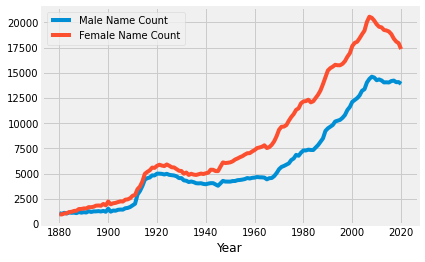

In [6]:
plt.figure();
name_count_by_year.plot();

### Generating Histogram of Name Frequencies

1. Proof of concept on small slice of data
2. Take last 10 years of data and aggregate M/F names for plots
3. Think about looking at plots over time? 

In [7]:
mini_data = babynames.head(25)
mini_data.head()

,Name,Sex,Count,Year
0,mary,F,7065,1880
1,anna,F,2604,1880
2,emma,F,2003,1880
3,elizabeth,F,1939,1880
4,minnie,F,1746,1880


In [8]:
counts = mini_data.groupby(['Name']).sum()
counts = counts.sort_values(by='Count',ascending=False)
counts.head()

,Count,Year
Name,,
mary,7065,1880
anna,2604,1880
emma,2003,1880
elizabeth,1939,1880
minnie,1746,1880


<AxesSubplot:xlabel='Name'>

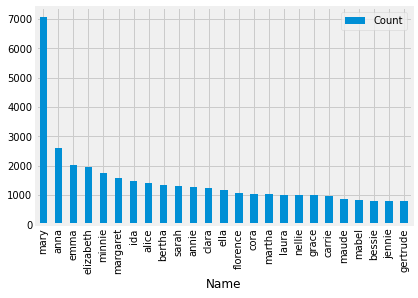

In [9]:
counts.plot.bar(y='Count')

In [10]:
recent_f_names = female_names[female_names['Year']>=2010]
recent_f_names

,Name,Sex,Count,Year
0,isabella,F,22924,2010
1,sophia,F,20646,2010
2,emma,F,17351,2010
3,olivia,F,17029,2010
4,ava,F,15436,2010
...,...,...,...,...
17355,zykeria,F,5,2020
17356,zylani,F,5,2020
17357,zylynn,F,5,2020
17358,zynique,F,5,2020


In [11]:
f_counts = recent_f_names[['Name','Count']].groupby(['Name']).sum()
f_counts = f_counts.sort_values(by='Count',ascending=False)
f_counts.head()

,Count
Name,
emma,210336
olivia,201826
sophia,193872
isabella,182331
ava,168690


In [12]:
f_counts.shape

(35159, 1)

In [13]:
f_counts.iloc[100:110]

,Count
Name,
willow,31326
jasmine,31224
rylee,31186
reagan,31185
cora,30785
isabelle,30699
valentina,30525
natalia,30407
quinn,30256


In [14]:
f_counts.index

Index(['emma', 'olivia', 'sophia', 'isabella', 'ava', 'mia', 'abigail',
       'emily', 'charlotte', 'amelia',
       ...
       'sydalee', 'sybrina', 'kearia', 'keaura', 'syara', 'keaysia', 'keelia',
       'keenya', 'keerthika', 'kastle'],
      dtype='object', name='Name', length=35159)

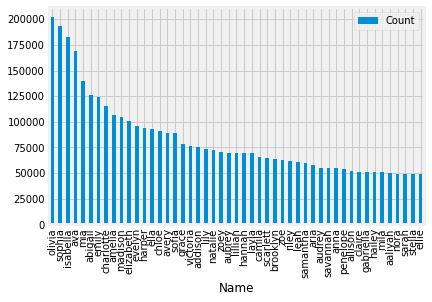

In [15]:
f_counts.iloc[1:50].plot.bar(y='Count');

In [16]:
f_counts_only = f_counts.reset_index()

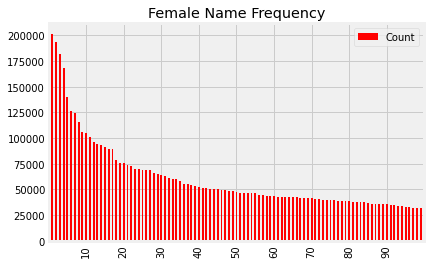

In [17]:
axs = f_counts_only.iloc[1:100].plot.bar(y='Count', color="red", title="Female Name Frequency");
axs.set_xticks(range(-1,101,10));

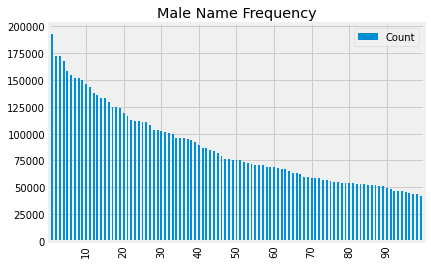

In [18]:
recent_m_names = male_names[male_names['Year']>=2010]
m_counts = recent_m_names[['Name','Count']].groupby(['Name']).sum()
m_counts = m_counts.sort_values(by='Count',ascending=False)
m_counts_only = m_counts.reset_index()
axs = m_counts_only.iloc[1:100].plot.bar(y='Count', title="Male Name Frequency");
axs.set_xticks(range(-1,101,10));

### Create a helper function to repeat analysis for different ranges

In [19]:
def plot_freq_by_gender_date(all_names, sex, start_year, end_year, cap=100):
    names = babynames[babynames['Sex']==sex]
    recent_names = names[(names['Year']>=start_year) & (names['Year']<=end_year)]
    counts = recent_names[['Name','Count']].groupby(['Name']).sum()
    counts = counts.sort_values(by='Count',ascending=False).reset_index()
    title = sex+" Name Freqency "+str(start_year)+"-"+str(end_year)
    if sex=='F':
        color = "purple"
    else:
        color = "blue"
    axs = counts.iloc[0:cap].plot.bar(y='Count', title=title, color=color);
    axs.set_xticks(range(0,cap+1,10));
    return counts

0          emma
1        olivia
2        sophia
3      isabella
4           ava
        ...    
95    alexandra
96        elena
97       eliana
98        kayla
99        maria
Name: Name, Length: 100, dtype: object

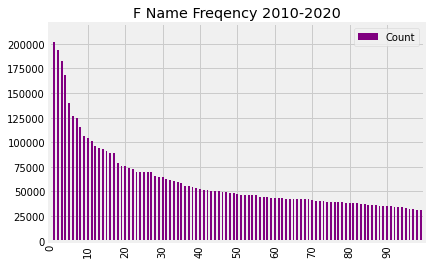

In [20]:
f_counts = plot_freq_by_gender_date(babynames, 'F', 2010, 2020, cap=100)
f_counts['Name'][0:100]

,Name,Count
0,noah,201245
1,liam,193376
2,william,172238
3,jacob,172154
4,mason,167681
...,...,...
26187,jayy,5
26188,stevyn,5
26189,jazair,5
26190,jazavian,5


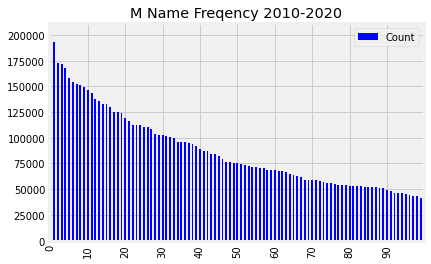

In [21]:
plot_freq_by_gender_date(babynames, 'M', 2010, 2020, cap=100)

1       jessica
2        ashley
3         sarah
4      samantha
5        taylor
6        hannah
7        alexis
8        rachel
9     elizabeth
10        kayla
11        megan
12       amanda
13     brittany
14      madison
15       lauren
16      brianna
17     victoria
18     jennifer
19    stephanie
Name: Name, dtype: object
1       jessica
2        ashley
3         sarah
4        hannah
5      samantha
6        taylor
7        alexis
8     elizabeth
9       madison
10        megan
11        kayla
12       rachel
13       lauren
14       alyssa
15       amanda
16      brianna
17     jennifer
18     victoria
19     brittany
Name: Name, dtype: object
1        hannah
2      samantha
3         sarah
4        ashley
5        alexis
6        taylor
7       jessica
8       madison
9     elizabeth
10       alyssa
11        kayla
12        megan
13       lauren
14       rachel
15     victoria
16      brianna
17      abigail
18       amanda
19     jennifer
Name: Name, dtype: object
1        o

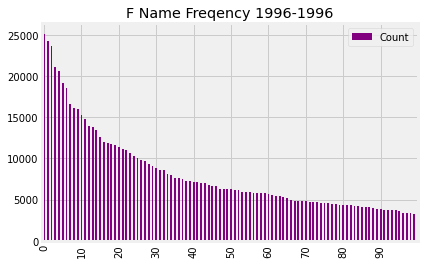

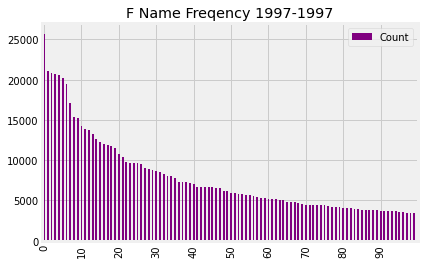

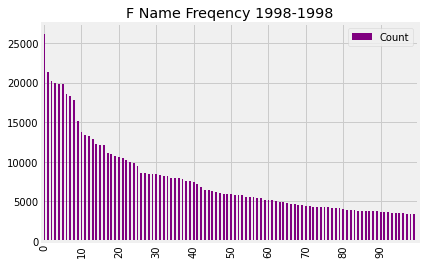

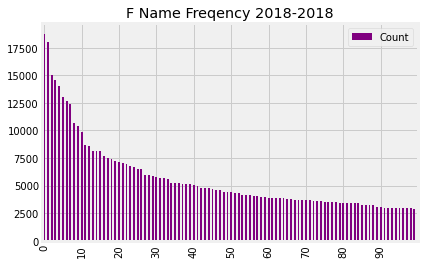

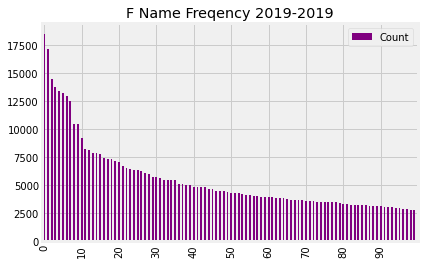

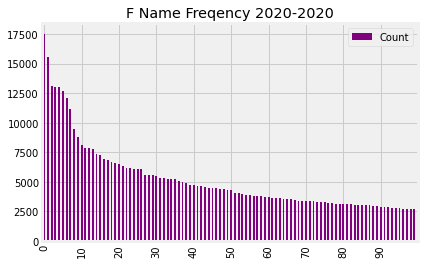

In [22]:
f_counts_by_year = {}
for year in [1996,1997,1998,2018,2019,2020]:
    f_counts_by_year[year] = plot_freq_by_gender_date(babynames, 'F', year, year, cap=100)
    print(f_counts_by_year[year]['Name'][1:20])

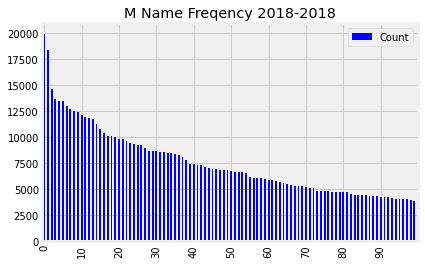

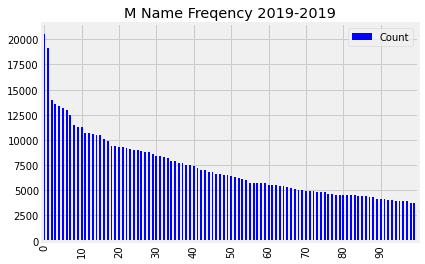

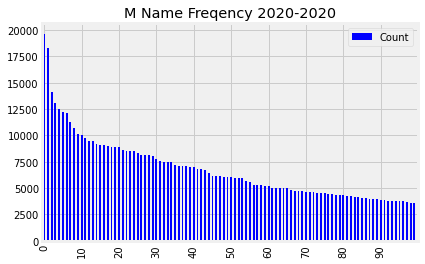

In [23]:
for year in [2018,2019,2020]:
    plot_freq_by_gender_date(babynames, 'M', year, year, cap=100)

In [24]:
names = babynames[babynames['Sex']=="F"]
recent_names = names[(names['Year']>=1997) & (names['Year']<=1997)]
counts = recent_names[['Name','Count']].groupby(['Name']).sum()
counts = counts.sort_values(by='Count',ascending=False)

counts.head(10)

,Count
Name,
emily,25734
jessica,21043
ashley,20896
sarah,20711
hannah,20594
samantha,20169
taylor,19502
alexis,17170
elizabeth,15426


### Convert to Percentages for Inter-year Comparisons

In [25]:
baby_counts = babynames.groupby(['Year','Sex']).sum()
baby_counts

Count
Year Sex         
1880 F      90994
     M     110490
1881 F      91953
     M     100738
1882 F     107847
...           ...
2018 M    1810309
2019 F    1670419
     M    1785527
2020 F    1598836
     M    1706423

[282 rows x 1 columns]

<AxesSubplot:xlabel='Year'>

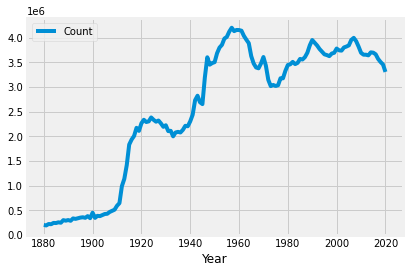

In [26]:
babies_by_year = baby_counts.groupby(['Year']).sum()
babies_by_year.plot()

In [27]:
f_baby_count_by_year = babynames[babynames['Sex']=='F'].groupby(['Year']).sum()
m_baby_count_by_year = babynames[babynames['Sex']=='M'].groupby(['Year']).sum()
f_baby_count_by_year.head(-1)

,Count
Year,
1880,90994
1881,91953
1882,107847
1883,112319
1884,129019
...,...
2015,1782079
2016,1768360
2017,1722140


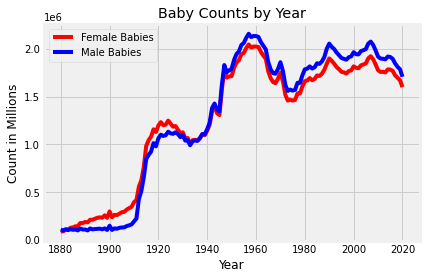

In [28]:
f_baby_count_by_year = f_baby_count_by_year.rename({'Count':'Female Babies'}, axis='columns')
m_baby_count_by_year = m_baby_count_by_year.rename({'Count':'Male Babies'}, axis='columns')
baby_counts_by_year_gender = pd.concat([f_baby_count_by_year, m_baby_count_by_year], axis=1)
baby_counts_by_year_gender.plot(color=["red","blue"], title="Baby Counts by Year", ylabel="Count in Millions");

In [29]:
baby_counts.head()

Count
Year Sex        
1880 F     90994
     M    110490
1881 F     91953
     M    100738
1882 F    107847

In [30]:
baby_counts.index#[('1880','F')]

MultiIndex([(1880, 'F'),
            (1880, 'M'),
            (1881, 'F'),
            (1881, 'M'),
            (1882, 'F'),
            (1882, 'M'),
            (1883, 'F'),
            (1883, 'M'),
            (1884, 'F'),
            (1884, 'M'),
            ...
            (2016, 'F'),
            (2016, 'M'),
            (2017, 'F'),
            (2017, 'M'),
            (2018, 'F'),
            (2018, 'M'),
            (2019, 'F'),
            (2019, 'M'),
            (2020, 'F'),
            (2020, 'M')],
           names=['Year', 'Sex'], length=282)

In [31]:
print(baby_counts.loc[1997,'F'])
baby_counts.loc[1997,:]

Count    1740454
Name: (1997, F), dtype: int64


,Count
Sex,
F,1740454
M,1884872


In [36]:
#not quite working yet 
def get_percentage(data):
    return baby_counts.loc[data['Year'],data['Sex']]

#### goal: create a new column in original babynames df with the percentage of babies that year of that gender with the name for the row. 